### Подключение модулей

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [163]:
df = pd.read_csv('USA_Housing.csv')

In [164]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.4586,5.6829,7.0092,4.0900,23086.8005,1059033.5579,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6425,6.0029,6.7308,3.0900,40173.0722,1505890.9148,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.0672,5.8659,8.5127,5.1300,36882.1594,1058987.9879,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2400,7.1882,5.5867,3.2600,34310.2428,1260616.8066,USS Barnett\nFPO AP 44820
4,59982.1972,5.0406,7.8394,4.2300,26354.1095,630943.4893,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [166]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


In [167]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [168]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


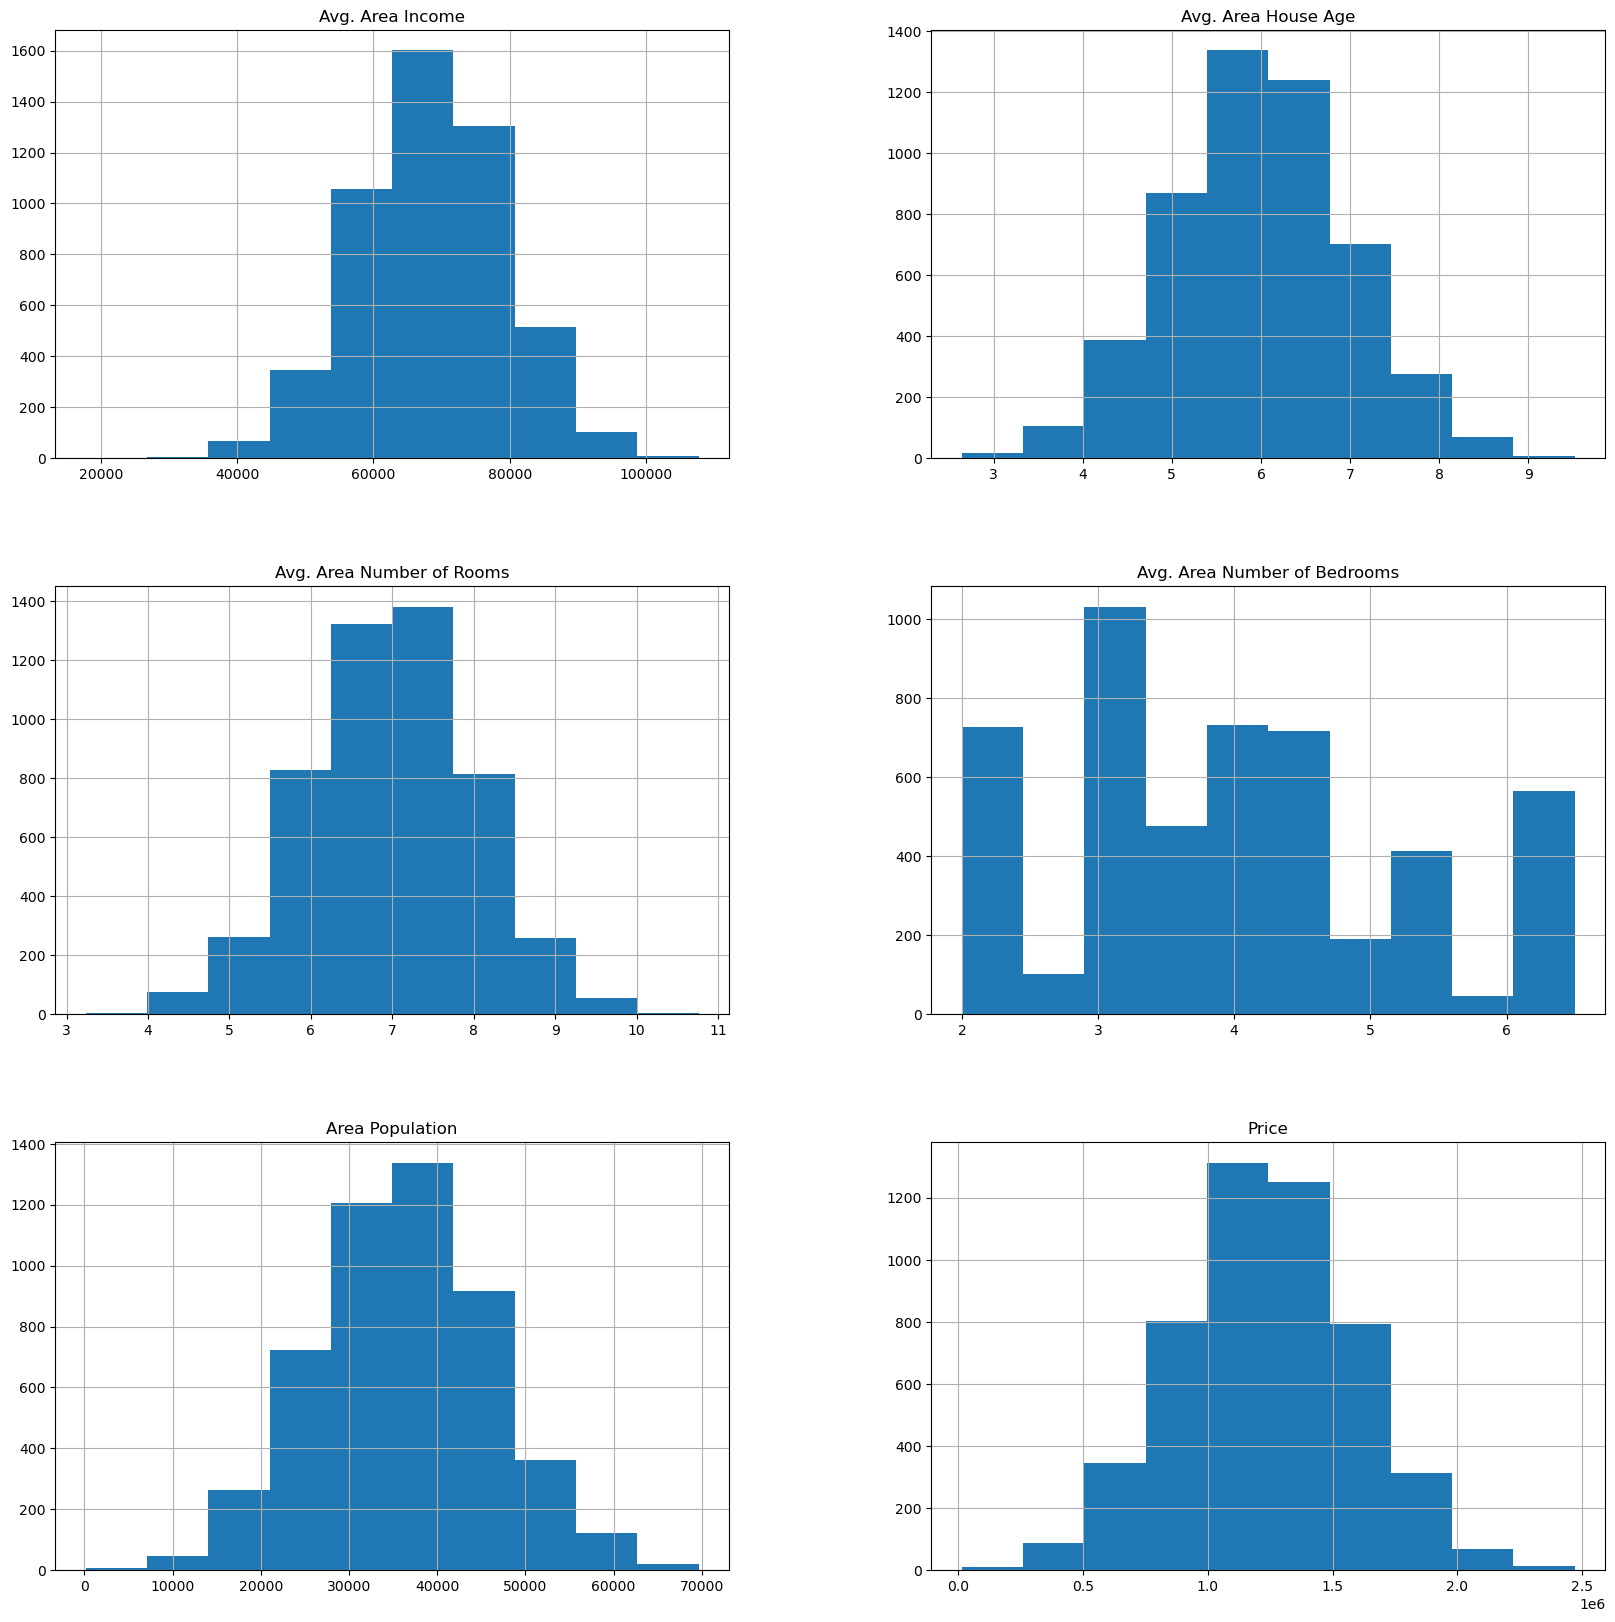

In [169]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

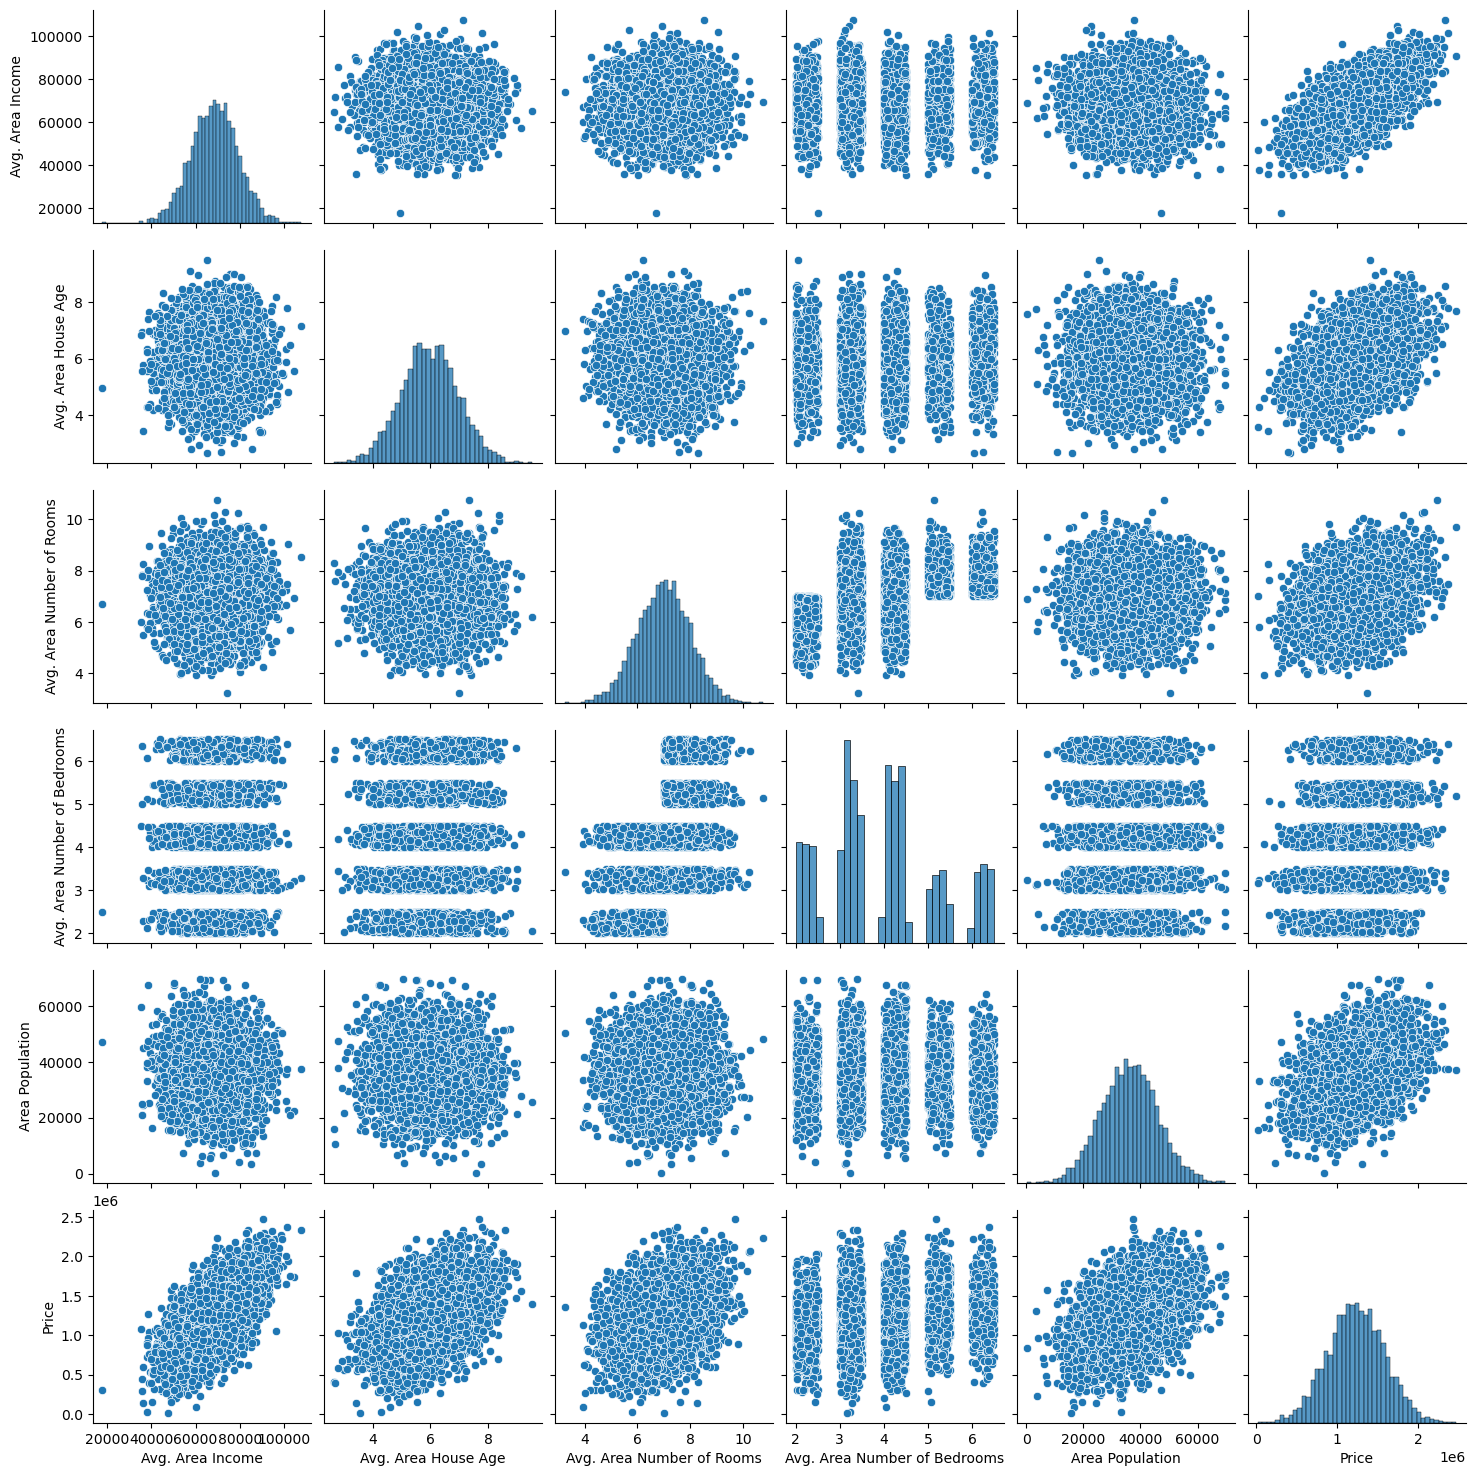

In [170]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

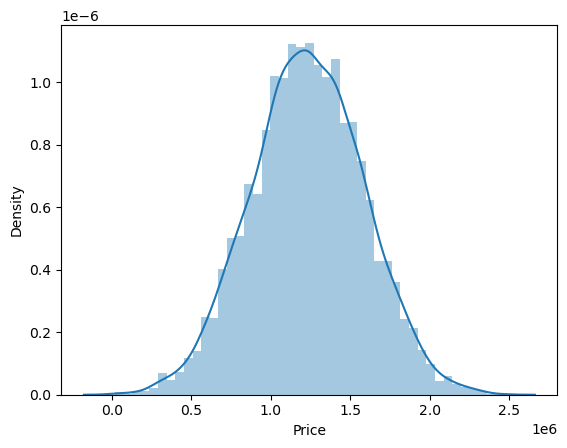

In [171]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

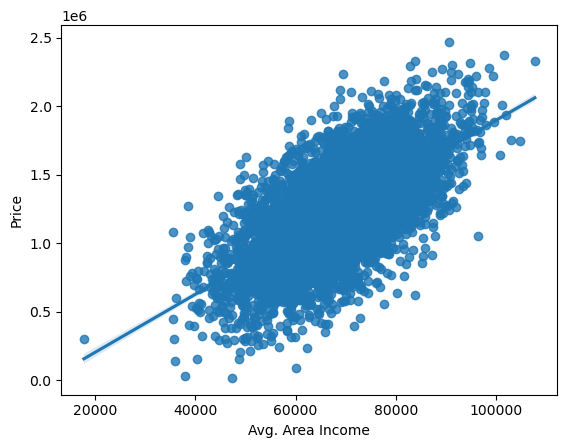

In [172]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [173]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

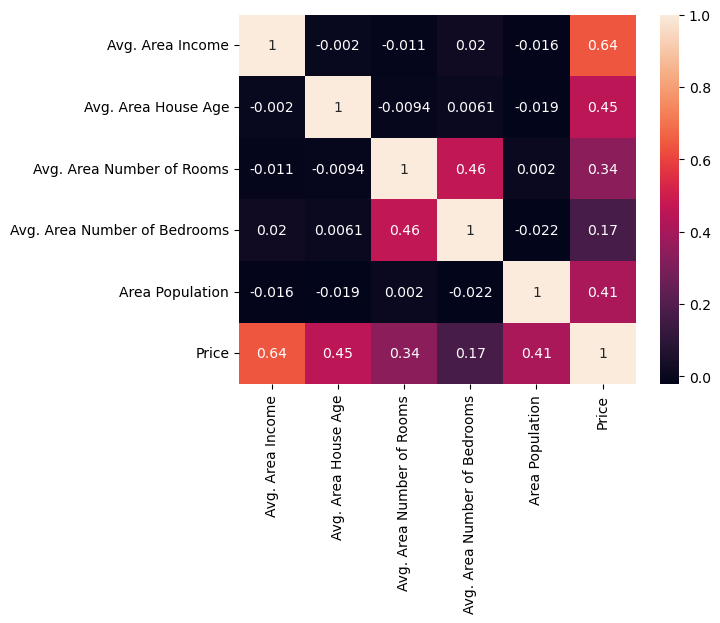

In [174]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [175]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

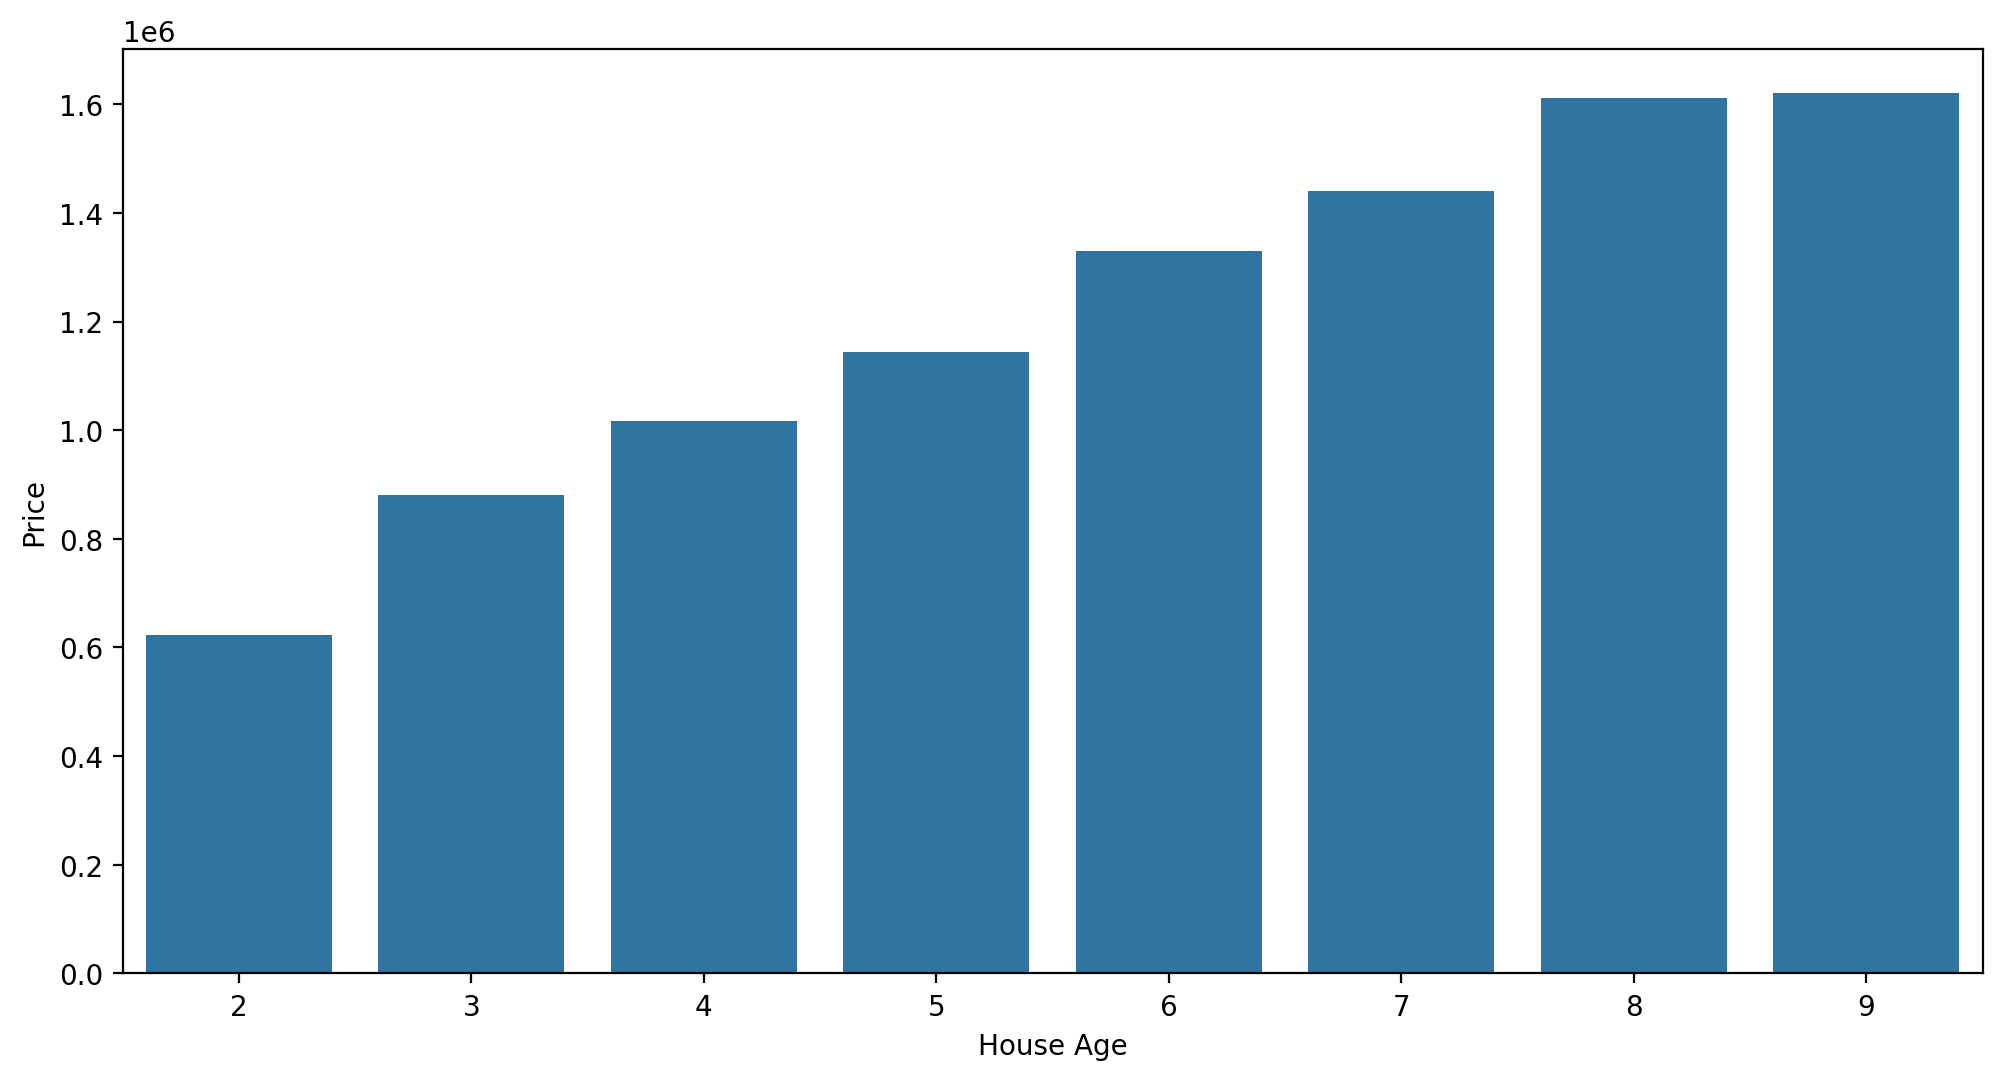

In [176]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [177]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

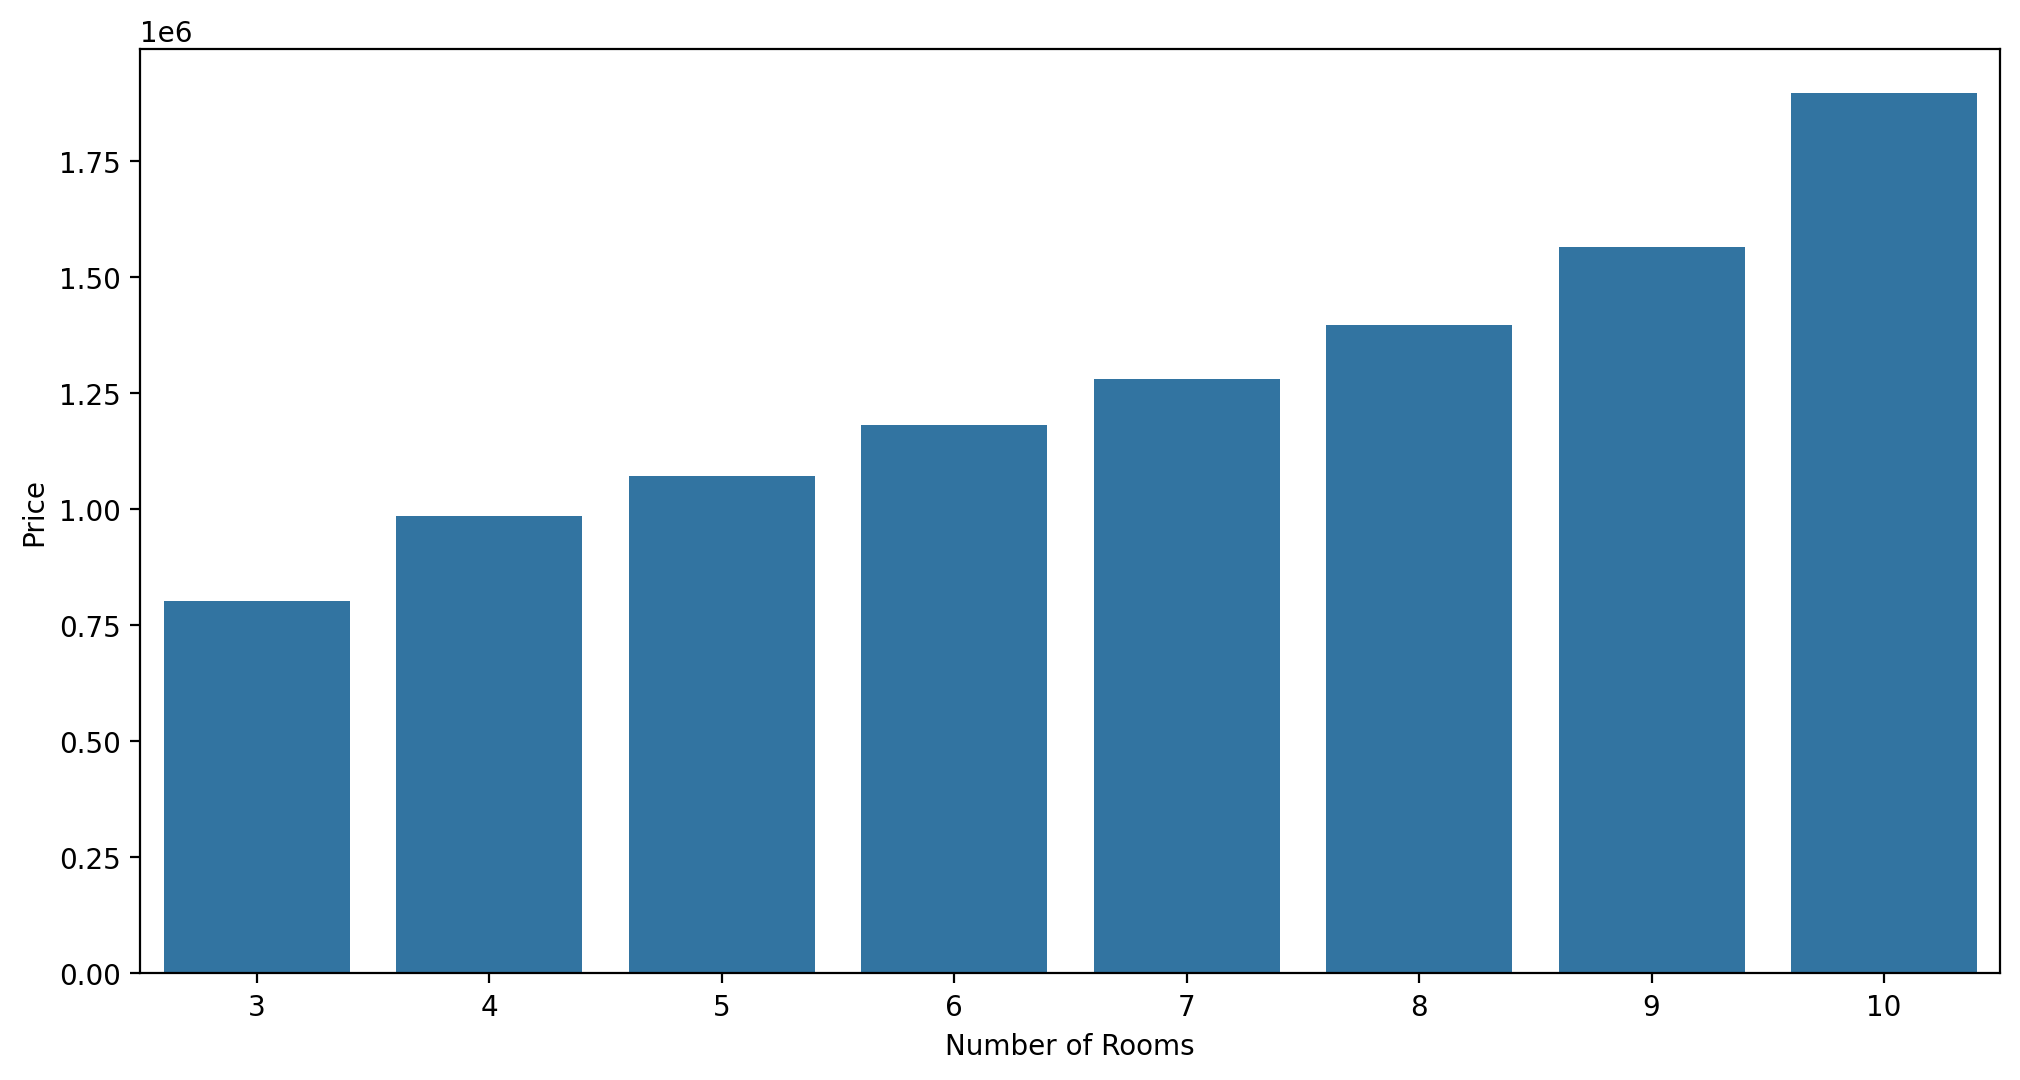

In [178]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [179]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

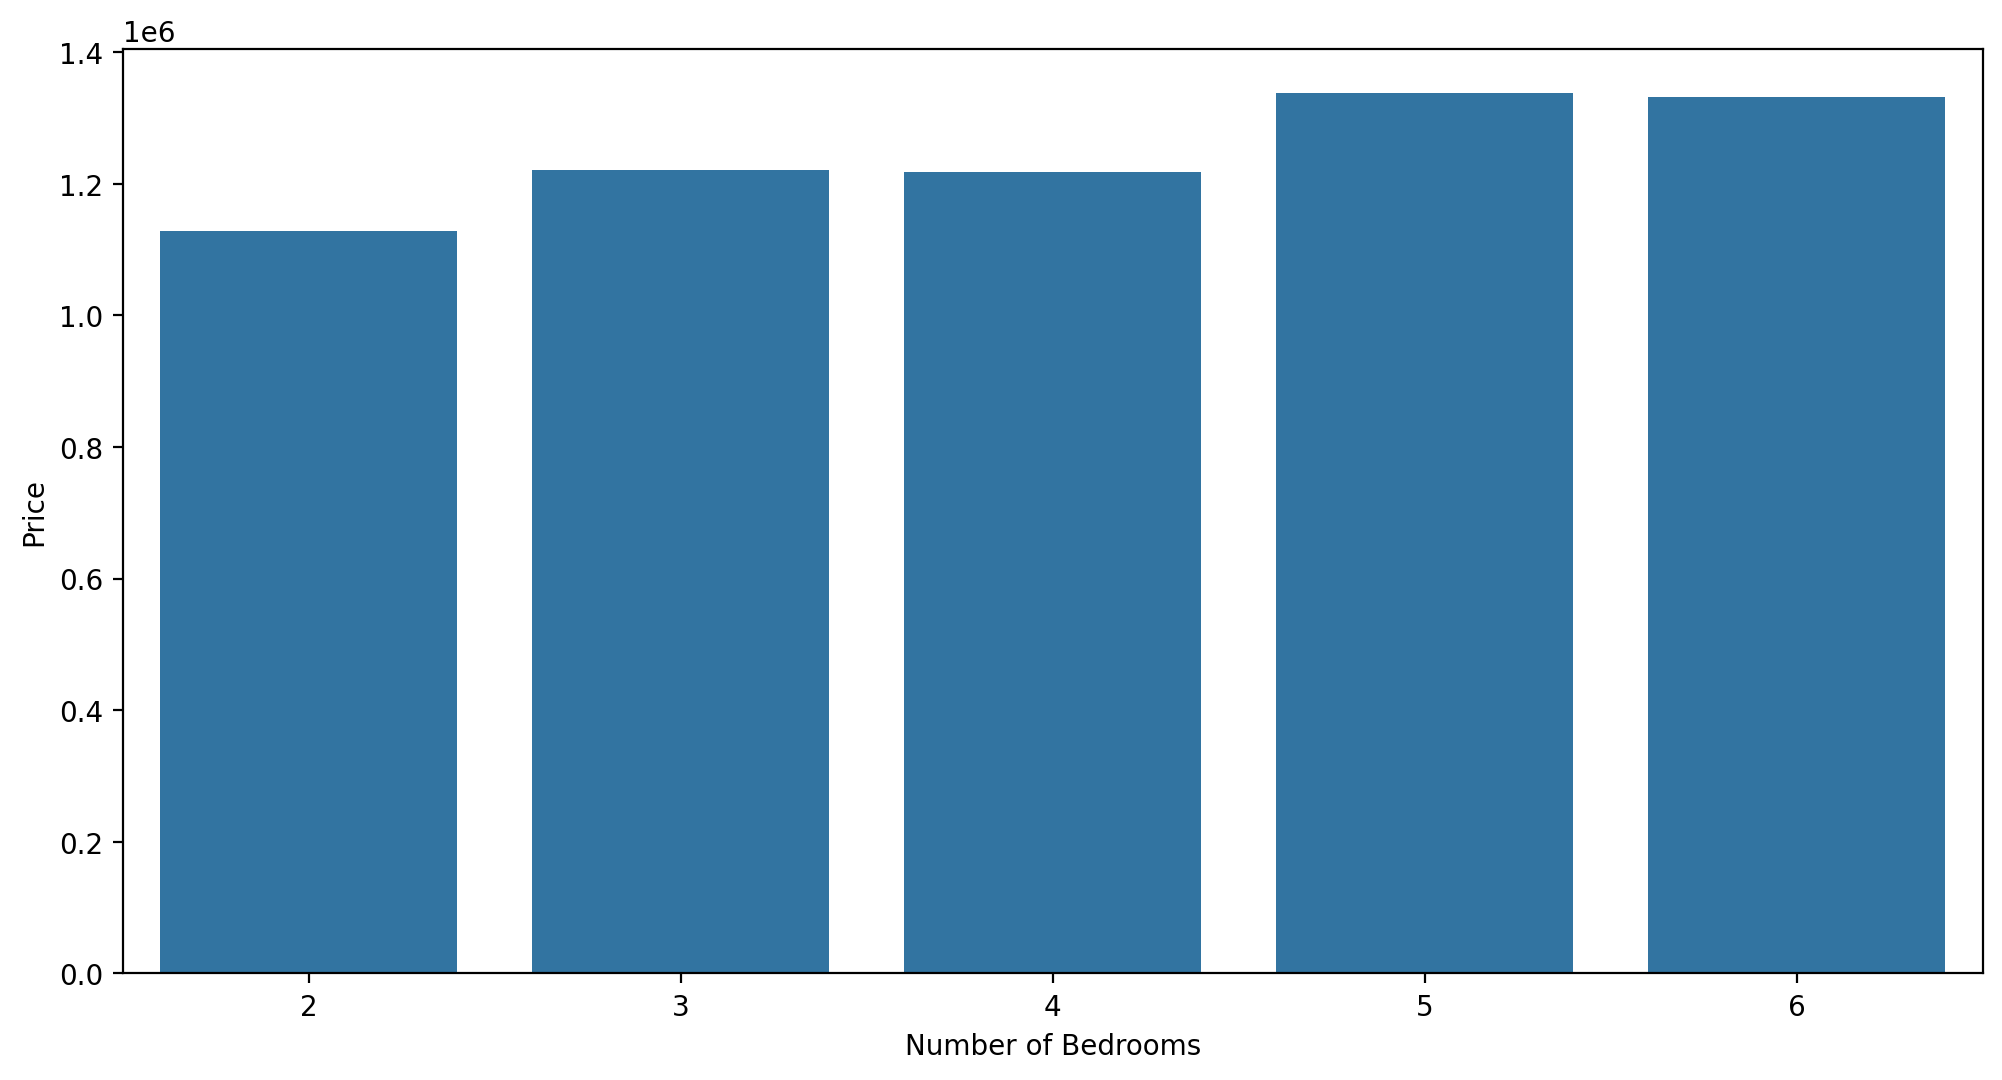

In [180]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [181]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [182]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [183]:
y = df['Price']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
lrm.intercept_

np.float64(-2638673.426191325)

In [189]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [190]:
predictions = lrm.predict(X_test)

In [191]:
predictions

array([1308536.1359262 , 1237122.72746477, 1243835.62817066, ...,
       1457119.79297242, 1483428.9530937 , 1047510.59737176])

In [192]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

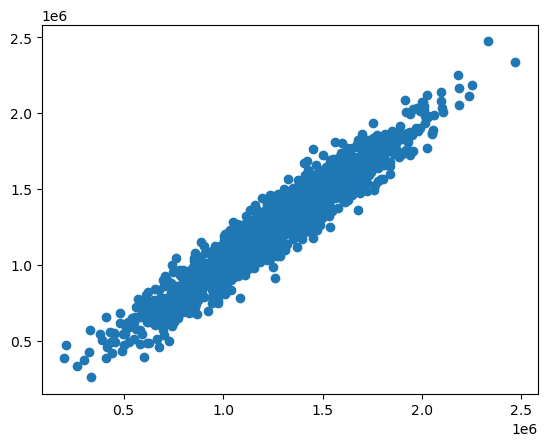

In [193]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

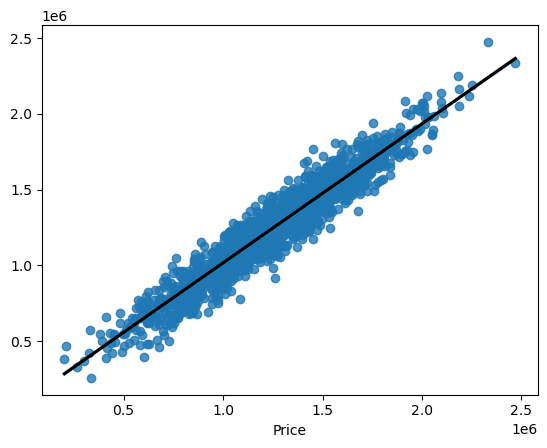

In [194]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

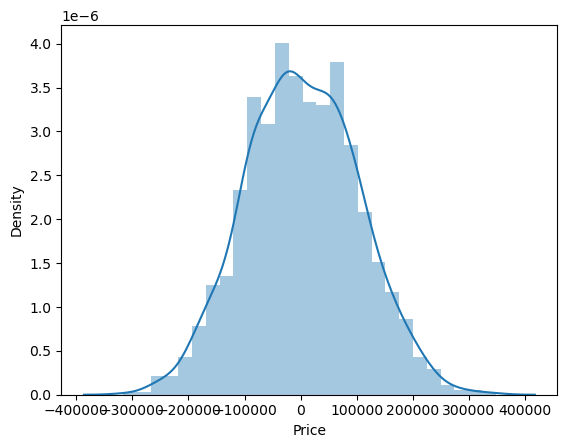

In [195]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [196]:
from sklearn import metrics

In [197]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336875

In [198]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401081

In [199]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485537)

In [200]:
metrics.r2_score(y_test, predictions)

0.9146818498753999

<Axes: xlabel='Price', ylabel='Density'>

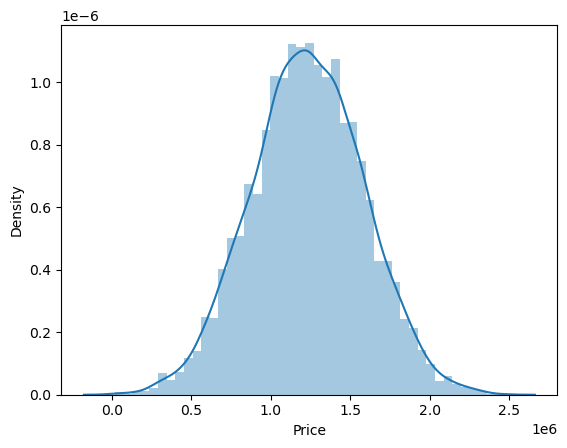

In [201]:
sns.distplot(df['Price'])

<Axes: >

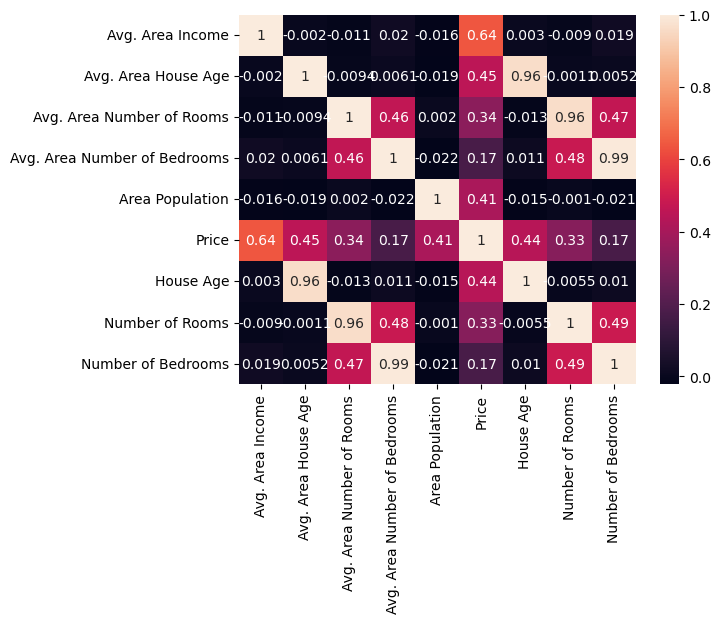

In [202]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

### Подготовка данных

In [203]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

### Обучение модели нейронной сети

In [205]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.Dense(16, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse',
              metrics=['mae', 'mse'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [206]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9438 - mae: 0.4197 - mse: 0.3356 - val_loss: 0.5995 - val_mae: 0.2471 - val_mse: 0.0949
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5098 - mae: 0.2436 - mse: 0.0914 - val_loss: 0.4263 - val_mae: 0.2345 - val_mse: 0.0852
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3741 - mae: 0.2378 - mse: 0.0874 - val_loss: 0.3216 - val_mae: 0.2305 - val_mse: 0.0826
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2906 - mae: 0.2346 - mse: 0.0852 - val_loss: 0.2562 - val_mae: 0.2290 - val_mse: 0.0817
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2371 - mae: 0.2340 - mse: 0.0847 - val_loss: 0.2142 - val_mae: 0.2302 - val_mse: 0.0819
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2026 - mae: 0.2340 - mse: 0.0847 - val_loss: 0.1863 - val_mae: 0.2306 - val_mse: 0.0816
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1782 - mae: 0.2322 - mse: 0.0838 - val_loss

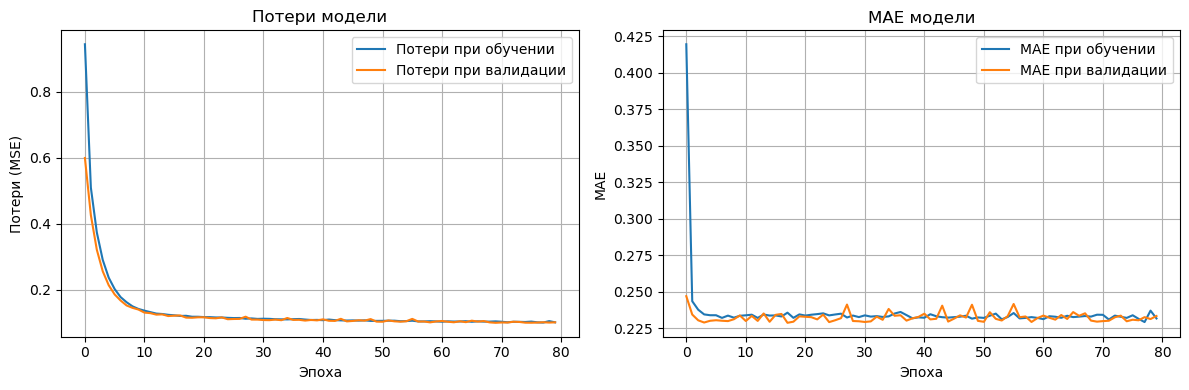

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
axes[0].plot(history.history['loss'], label='Потери при обучении')
axes[0].plot(history.history['val_loss'], label='Потери при валидации')
axes[0].set_title('Потери модели')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Потери (MSE)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['mae'], label='MAE при обучении')
axes[1].plot(history.history['val_mae'], label='MAE при валидации')
axes[1].set_title('MAE модели')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Оценка модели

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


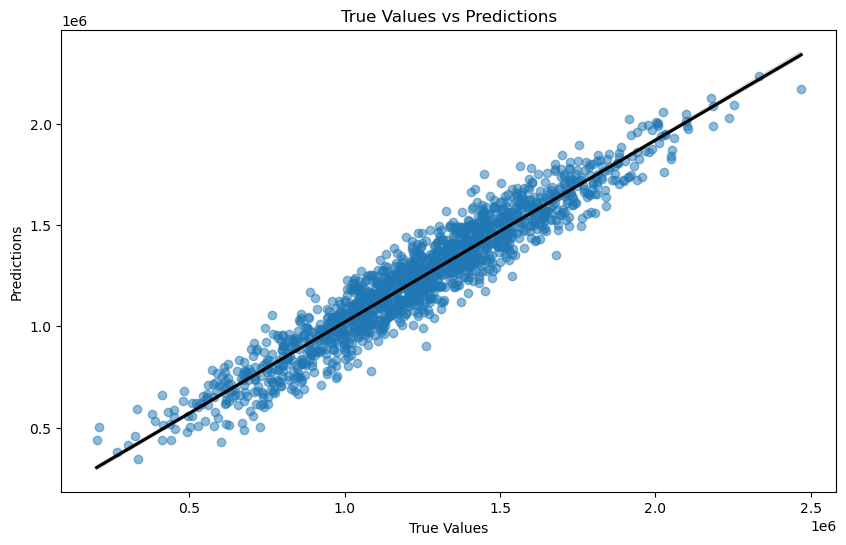

In [208]:
predictions_scaled = model.predict(X_test_scaled)
predictions = y_scaler.inverse_transform(predictions_scaled)

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=predictions.flatten(), scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

<Axes: ylabel='Density'>

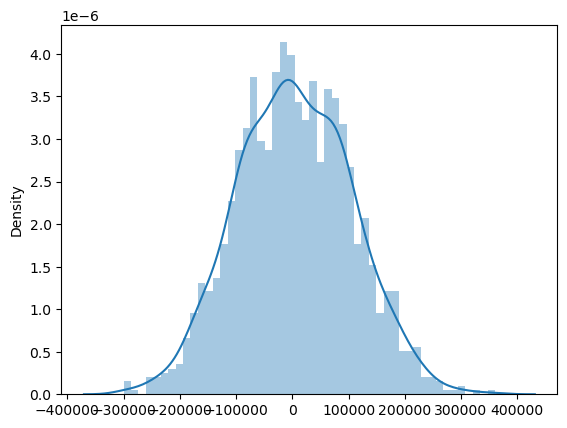

In [209]:
sns.distplot((y_test.values - predictions.flatten()), bins=50)

In [210]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

MAE: 81970.62698410961
MSE: 10316813842.778034
RMSE: 101571.71773076418
R2 Score: 0.9125770230885669


### Вывод

В рамках работы была разработана и обучена нейросеть для решения задачи регрессии. 
**Полученные результаты**:
   - На графиках процесса обучения наблюдается уменьшение ошибки как на тренировочной, так и на валидационной выборке
   - Диаграмма `regplot` выявляет выраженную линейную корреляцию между прогнозируемыми и фактическими значениями, что свидетельствует о высоком качестве построенной модели

Следовательно, нейронная модель эффективно выполнила задачу предсказания стоимости жилья.
